# Introduction









# Features introduction

# Objective

# Notices


### <font color='blue'>With any stage with blue color, the code can run directly from the stage </font>

In [3]:
import numpy as np
import pandas as pd
import json
import requests
import re
import os
from datetime import datetime as dt
from pandas.io.json import json_normalize
import geocoder
import matplotlib.pylab as plt
import seaborn as sns
import shapefile
from sklearn import preprocessing
%matplotlib inline

## Gathering raw data from data.gov.sg

### <font color='blue'>Stage 1</font>

#### <font color='red'>df_init is the raw data from websites</font>

In [4]:
url1 = 'https://data.gov.sg/api/action/datastore_search?resource_id=42ff9cfe-abe5-4b54-beda-c88f9bb438ee'
url2 = 'https://data.gov.sg/api/action/datastore_search?resource_id=1b702208-44bf-4829-b620-4615ee19b57c'
url3 = 'https://data.gov.sg/api/action/datastore_search?resource_id=83b2fc37-ce8c-4df4-968b-370fd818138b'
url4 = 'https://data.gov.sg/api/action/datastore_search?resource_id=8c00bf08-9124-479e-aeca-7cc411d884c4'
url5 = 'https://data.gov.sg/api/action/datastore_search?resource_id=adbbddd3-30e2-445f-a123-29bee150a6fe'
urls = [url1, url2, url3, url4, url5]

df_init = pd.DataFrame()
for url in urls:
    result = requests.get(url).json()['result']
    url = url + '&limit={}'.format(result['total'])
    df_init = df_init.append(pd.DataFrame(requests.get(url).json()['result']['records']))

print(len(df_init))

836330


#### 1.1 Save the loaded data file as csv locally

In [5]:
df_init.to_csv("dat_init.csv", index = False)

### <font color='blue'>Stage 2</font>

#### 2.1 Check NaN data 

In [9]:
df_init = pd.read_csv("dat_init.csv")

print(len(df_init[df_init['remaining_lease'].isna()]),
### <font color='blue'>Stage 1</font>### <font color='blue'>Stage 1</font>len(df_init[df_init['month'].isna()]),
len(df_init[df_init['town'].isna()]),
len(df_init[df_init['flat_type'].isna()]),
len(df_init[df_init['flat_model'].isna()]),
len(df_init[df_init['floor_area_sqm'].isna()]),
len(df_init[df_init['street_name'].isna()]),
len(df_init[df_init['resale_price'].isna()]),
len(df_init[df_init['storey_range'].isna()]),
len(df_init[df_init['block'].isna()]))

709054 0 0 0 0 0 0 0 0 0


#### 2.2 Get the missing info remaining lease from commence date

In [10]:
df_init['remaining_lease'] = df_init['lease_commence_date'].astype(int) - 1918

In [11]:
print(len(df_init[df_init['remaining_lease'].isna()]),
len(df_init[df_init['month'].isna()]),
len(df_init[df_init['town'].isna()]),
len(df_init[df_init['flat_type'].isna()]),
len(df_init[df_init['flat_model'].isna()]),
len(df_init[df_init['floor_area_sqm'].isna()]),
len(df_init[df_init['street_name'].isna()]),
len(df_init[df_init['resale_price'].isna()]),
len(df_init[df_init['storey_range'].isna()]),
len(df_init[df_init['block'].isna()]))

0 0 0 0 0 0 0 0 0 0


#### 2.3 Clean the raw data features and features type

In [12]:
# Regular the type of features
df_init['month'] = pd.to_datetime(df_init['month'], format = '%Y-%m')
df_init['year'] = pd.DatetimeIndex(df_init['month']).year
df_init['month'] = pd.DatetimeIndex(df_init['month']).month
df_init[['floor_area_sqm', 'resale_price']] = df_init[['floor_area_sqm', 'resale_price']].astype(float)
df_init[['year', 'lease_commence_date']] = df_init[['year', 'lease_commence_date']].astype(int)
print(df_init.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836330 entries, 0 to 836329
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 836330 non-null  object 
 1   flat_type            836330 non-null  object 
 2   flat_model           836330 non-null  object 
 3   floor_area_sqm       836330 non-null  float64
 4   street_name          836330 non-null  object 
 5   resale_price         836330 non-null  float64
 6   month                836330 non-null  int64  
 7   remaining_lease      836330 non-null  int64  
 8   lease_commence_date  836330 non-null  int64  
 9   storey_range         836330 non-null  object 
 10  _id                  836330 non-null  int64  
 11  block                836330 non-null  object 
 12  year                 836330 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 82.9+ MB
None


In [14]:
print(df_init.describe())

       floor_area_sqm  resale_price          month  remaining_lease  \
count   836330.000000  8.363300e+05  836330.000000    836330.000000   
mean        95.596934  2.957255e+05       6.587163        69.259338   
std         26.038565  1.502034e+05       3.411760         9.575564   
min         28.000000  5.000000e+03       1.000000        48.000000   
25%         73.000000  1.820000e+05       4.000000        62.000000   
50%         93.000000  2.770000e+05       7.000000        68.000000   
75%        114.000000  3.850000e+05      10.000000        76.000000   
max        307.000000  1.258000e+06      12.000000       101.000000   

       lease_commence_date            _id           year  
count        836330.000000  836330.000000  836330.000000  
mean           1987.259338  138315.133905    2004.421722  
std               9.575564  103977.314513       8.065613  
min            1966.000000       1.000000    1990.000000  
25%            1980.000000   42983.000000    1998.000000  
50%   

In [17]:
df_init.to_csv("dat_init_stage_3.csv", index = False)

#### 2.4 Observations from df_init.describe :



#### 

### <font color='blue'>Stage 3</font>

In [22]:
df_init = pd.read_csv("dat_init_stage_3.csv")

#### 3.1 Calculate new features 

##### We will predict the price by price per sqm instead of the total price of the house

In [23]:
df_init['price_sqm'] = df_init['resale_price']/df_init['floor_area_sqm']
df_init.head()

,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,remaining_lease,lease_commence_date,storey_range,_id,block,year,price_sqm
0,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,232000.0,1,61,1979,10 TO 12,1,406,2017,5272.727273
1,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 4,250000.0,1,60,1978,01 TO 03,2,108,2017,3731.343284
2,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,262000.0,1,62,1980,01 TO 03,3,602,2017,3910.447761
3,ANG MO KIO,3 ROOM,New Generation,68.0,ANG MO KIO AVE 10,265000.0,1,62,1980,04 TO 06,4,465,2017,3897.058824
4,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,265000.0,1,62,1980,01 TO 03,5,601,2017,3955.223881


##### Map town to region, still preserve town data

In [24]:
df_init['town'].nunique()

north_east = "NORTH_EAST"
east = "EAST"
west = "WEST"
north = "NORTH"
central = "CENTRAL"
unknow = "UNKNOWN"

town_to_geographical_region  = {
    "ANG MO KIO" : north_east,
    "BEDOK" : east,
    "BISHAN" : central,
    "BUKIT BATOK" : west,
    "BUKIT MERAH" : central,
    "BUKIT PANJANG" : west,
    "BUKIT TIMAH" : central,
    "CENTRAL AREA" : central,
    "CHOA CHU KANG" : west,
    "CLEMENTI" : west,
    "GEYLANG" : central,
    "HOUGANG" : north_east,
    "JURONG EAST" : west,
    "JURONG WEST" : west,
    "KALLANG/WHAMPOA" : central,
    "MARINE PARADE" : central,
    "PASIR RIS" : east,
    "PUNGGOL" : north_east,
    "QUEENSTOWN" : west,
    "SEMBAWANG" : north,
    "SENGKANG" : north_east,
    "SERANGOON" : north_east,
    "TAMPINES" : east,
    "TOA PAYOH" : central,
    "WOODLANDS" : north,
    "YISHUN" : north,
    "LIM CHU KANG" : north
}

In [25]:
df_init['direction'] = df_init['town'].apply(lambda x : town_to_geographical_region[x])
df_init

,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,remaining_lease,lease_commence_date,storey_range,_id,block,year,price_sqm,direction
0,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,232000.0,1,61,1979,10 TO 12,1,406,2017,5272.727273,NORTH_EAST
1,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 4,250000.0,1,60,1978,01 TO 03,2,108,2017,3731.343284,NORTH_EAST
2,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,262000.0,1,62,1980,01 TO 03,3,602,2017,3910.447761,NORTH_EAST
3,ANG MO KIO,3 ROOM,New Generation,68.0,ANG MO KIO AVE 10,265000.0,1,62,1980,04 TO 06,4,465,2017,3897.058824,NORTH_EAST
4,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,265000.0,1,62,1980,01 TO 03,5,601,2017,3955.223881,NORTH_EAST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836325,YISHUN,EXECUTIVE,APARTMENT,142.0,YISHUN ST 61,456000.0,12,69,1987,10 TO 12,287196,611,1999,3211.267606,NORTH
836326,YISHUN,EXECUTIVE,APARTMENT,142.0,YISHUN CTRL,408000.0,12,70,1988,01 TO 03,287197,324,1999,2873.239437,NORTH
836327,YISHUN,EXECUTIVE,MAISONETTE,146.0,YISHUN AVE 6,469000.0,12,70,1988,07 TO 09,287198,392,1999,3212.328767,NORTH
836328,YISHUN,EXECUTIVE,MAISONETTE,146.0,YISHUN RING RD,440000.0,12,70,1988,04 TO 06,287199,356,1999,3013.698630,NORTH


##### Clean street_name

In [26]:
df_init['street_name'] = df_init['street_name'].str.replace('UPP ', 'UPPER ', regex = True)
df_init['street_name'] = df_init['street_name'].str.replace(' CTRL', ' CENTRAL', regex = True)
df_init['street_name'] = df_init['street_name'].str.replace('JLN ', 'JALAN ', regex = True)
df_init['street_name'] = df_init['street_name'].str.replace('BT ', 'BUKIT ', regex = True)
df_init['street_name'] = df_init['street_name'].str.replace('LOR ', 'LORONG ', regex = True)
df_init['street_name'] = df_init['street_name'].str.replace(' NTH', ' NORTH', regex = True)
df_init['street_name'] = df_init['street_name'].str.replace('NTH BRIDGE', 'NORTH BRIDGE', regex = True)
df_init['street_name'] = df_init['street_name'].str.replace('KG', 'KAMPONG', regex = True)
df_init['street_name'] = df_init['street_name'].str.replace(' DR', ' DRIVE', regex = True)
df_init['street_name'] = df_init['street_name'].str.replace('TG PAGAR', 'TANJONG PAGAR', regex = True)
df_init['street_name'] = df_init['street_name'].str.replace("C'WEALTH", 'COMMONWEALTH', regex = True)
df_init['street_name'] = df_init['street_name'].str.replace("WOODLANDS DRIVE 75", 'WOODLAND DRIVE 75', regex = True)
df_init['street_name'] = df_init['street_name'].str.replace("TAMAN HO SWEE", 'JALAN BUKIT HO SWEE', regex = True)
df_init['street_name'] = df_init['street_name'].str.replace("YUNG PING RD", '157 CORPORATION DRIVE', regex = True)
df_init['street_name'] = df_init['street_name'].str.replace("YUNG LOH RD", '157 CORPORATION DRIVE', regex = True)

In [27]:
address_set = df_init["street_name"].unique().tolist()
print(len(address_set))

569


In [28]:
df_init.to_csv("dat_init_stage_4.csv", index = False)

### <font color='blue'>Stage 4</font>

#### 4.1 Gathering new data - Coordinate

#### <font color='red'>df_lat_long is the coordination data retrieved using geocoder, map from street to coordinate</font>

In [31]:
latitude = np.zeros(len(address_set))
longitude = np.zeros(len(address_set))


for n in range(0,len(address_set)):
    geo = geocoder.osm(address_set[n] + ', SG')
    if geo.x is None:
        latitude[n] = 0
        longitude[n] = 0
    else:
        latitude[n] = geo.y
        longitude[n] = geo.x

latitude, longitude

(array([ 1.3676017 ,  1.3823185 ,  1.3768247 ,  1.3643546 ,  1.3696908 ,
         1.3827747 ,  1.3784539 ,  1.3832578 ,  1.3730573 ,  1.3340399 ,
         1.3297469 ,  1.3313413 ,  1.314061  ,  1.3296754 ,  1.3274218 ,
         1.3339821 ,  1.3198453 ,  1.325289  ,  1.3267815 ,  1.3258683 ,
         1.3569767 ,  1.3247239 ,  1.2846604 ,  1.3313564 ,  1.3376794 ,
         1.326493  ,  1.323155  ,  1.3260581 , -5.406307  ,  1.3313193 ,
         1.3264785 ,  1.3538309 ,  1.3603001 ,  1.3480256 ,  1.3508769 ,
         1.3599872 ,  1.3563979 ,  1.3601554 ,  1.3513259 ,  1.3637268 ,
         1.3556782 ,  1.3499936 ,  1.3543135 ,  1.3468302 ,  1.3548853 ,
         1.354495  ,  1.3515765 ,  1.358546  ,  1.3496472 ,  1.3598218 ,
         1.346703  ,  1.3375316 ,  1.3564848 ,  1.274558  ,  1.3426301 ,
         1.287298  ,  1.2728382 ,  1.2891495 ,  1.2774161 ,  1.2734284 ,
         1.2746254 ,  1.2860375 ,  1.2880059 ,  1.2779863 ,  1.28350915,
         1.2900221 ,  1.2859726 ,  1.2741667 ,  1.2

##### Save coordinate data locally for convenience

In [32]:
df_lat_long = pd.DataFrame(df_init['street_name'].unique())
df_lat_long['Latitude'] = latitude
df_lat_long['Longitude'] = longitude
df_lat_long.to_csv("df_lat_long.csv", index = False)
df_lat_long.columns = ['street_name','Latitude','Longitude']
df_lat_long

df_lat_long.columns = ['street_name','Latitude','Longitude']
df_lat_long[df_lat_long['Latitude'] == 0]
df_lat_long[df_lat_long['Longitude'] == 0]
# 1.3201, 103.8873
df_lat_long.loc[df_lat_long['street_name']=='JALAN PASAR BARU','Latitude'] = 1.3201
df_lat_long.loc[df_lat_long['street_name']=='JALAN PASAR BARU','Longitude'] = 103.8873

df_lat_long.loc[df_lat_long['street_name']=='NILE RD','Latitude'] = 1.2828
df_lat_long.loc[df_lat_long['street_name']=='NILE RD','Longitude'] = 103.8175

df_lat_long.loc[df_lat_long['street_name']=='JALAN MEMBINA BARAT','Latitude'] = 1.283347
df_lat_long.loc[df_lat_long['street_name']=='JALAN MEMBINA BARAT','Longitude'] = 103.826121

df_lat_long.loc[df_lat_long['street_name']=='BUANGKOK STH FARMWAY 1','Latitude'] = 1.38838781397
df_lat_long.loc[df_lat_long['street_name']=='BUANGKOK STH FARMWAY 1','Longitude'] = 103.987491735

##### check for none coordinate data

In [33]:
df_lat_long[df_lat_long['Latitude'] == 0]
df_lat_long[df_lat_long['Longitude'] == 0]

,street_name,Latitude,Longitude


In [34]:
df_lat_long.to_csv("df_lat_long.csv")

### <font color='blue'>Stage 5</font>

In [35]:
df_lat_long = pd.read_csv("df_lat_long.csv")

In [44]:
df_lat_long

,Unnamed: 0,street_name,Latitude,Longitude
0,0,ANG MO KIO AVE 10,1.367602,103.856844
1,1,ANG MO KIO AVE 4,1.382319,103.838706
2,2,ANG MO KIO AVE 5,1.376825,103.847556
3,3,ANG MO KIO AVE 1,1.364355,103.843642
4,4,ANG MO KIO AVE 3,1.369691,103.840906
...,...,...,...,...
564,564,JALAN MEMBINA BARAT,1.283347,103.826121
565,565,BUANGKOK STH FARMWAY 1,1.388388,103.987492
566,566,ALEXANDRA RD,1.273529,103.802049
567,567,SEMBAWANG RD,1.453349,103.831769


#### 5.1 Gathering new data - MRT, Bus, Schools, Entertainment, Park

#### <font color='red'>df_venues is the venue data by streets : credicted to  Foursquare</font>
https://developer.foursquare.com/docs/build-with-foursquare/categories/

In [128]:
# # DEMO
date_t = dt.today().strftime("%Y%m%d")

url_demo = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section=food'.format(
            ID, Paw, date_t, 1.367602, 103.856844, 400, 100)
results = requests.get(url_demo).json()

results2 = requests.get(url_demo+'&section=food').json()

# results['response']
# print(results['response']['totalResults'])

# # GET https://api.foursquare.com/v2/venues/categories
# url_demo2 = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
#             ID, Paw, date_t, 1.367602, 103.856844, 400, 100)
# results2 = requests.get(url_demo).json()

# results2['response']

# url_price_low = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&price=1'.format(
#             ID, Paw, date_t, 1.367602, 103.856844, 400, 100)

# requests.get(url_price_low).json()['response']['totalResults']

In [ ]:
date_t = dt.today().strftime("%Y%m%d")
ID = 'I2E3FGJX0Z12Y0PHJ22W3WZBSUNDYWPJAQCFMSHJQBSAQJKG' 
Paw = 'K13KOCRW22OVDQJBMYNBD5B4EMWBPBLU5CCDX4UWVL3V3T03' 

def getNearbyPlaces(names, latitudes, longitudes, date_t, radius = 400, limit = 100,):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            ID, Paw, date_t, lat, lng, radius, limit)
        
        number_food = requests.get(url+'&section=food').json()['response']['totalResults']
        number_drink = requests.get(url+'&section=drinks').json()['response']['totalResults'] + requests.get(url+'&section=coffee').json()['response']['totalResults']
        
        number_shop = requests.get(url+'&section=shops').json()['response']['totalResults']
        number_art = requests.get(url+'&section=arts').json()['response']['totalResults']
        number_trending = requests.get(url+'&section=trending').json()['response']['totalResults']
        
        url_price_low = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&price=1'.format(
            ID, Paw, date_t, lat, lng, radius, limit)
        price_low = requests.get(url_price_low).json()['response']['totalResults']
        
        url_price_high = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&price=3,4'.format(
            ID, Paw, date_t, lat, lng, radius, limit)
        price_high = requests.get(url_price_high).json()['response']['totalResults']
        
        venues_list.append([(name, lat, lng, 
            number_food,number_drink,number_shop,number_art,number_trending,price_low,price_high)])
                            
                            
    selected_ven = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    selected_ven.columns = ['street_name', 'Latitude', 'Longitude', 'Food', 'Drink', 'Shope', 'Art', 'Trending']
    return(selected_ven)

df_venues = getNearbyPlaces(names = df_lat_long['street_name'],
                            latitudes = df_lat_long['Latitude'],
                            longitudes = df_lat_long['Longitude'],
                            date_t = dt.today().strftime("%Y%m%d"))

In [39]:
df_venues.to_csv('dat_venues.csv')

### <font color='blue'>Stage 6</font>

In [40]:
df_venues = pd.read_csv("dat_venues.csv")
df_venues['Venue Category'].unique()

array(['BBQ Joint', 'Chinese Restaurant', 'Food Court',
       'Fast Food Restaurant', 'Halal Restaurant', 'Coffee Shop',
       'Paper / Office Supplies Store', 'Bus Stop', 'Dance Studio',
       'Convenience Store', 'Hainan Restaurant', 'Playground',
       'Lingerie Store', 'Noodle House', 'Vegetarian / Vegan Restaurant',
       'Australian Restaurant', 'Malay Restaurant', 'Pool', 'Park', 'Gym',
       'College Auditorium', 'Electronics Store', 'College Cafeteria',
       'Dog Run', 'Spa', 'Asian Restaurant', 'Bar', 'Japanese Restaurant',
       'General Entertainment', 'Supermarket', 'Bus Station',
       'Indian Restaurant', 'Seafood Restaurant', 'Skate Park',
       'Soup Place', 'Grocery Store', 'Dessert Shop', 'Food & Drink Shop',
       'Tennis Court', 'Gym / Fitness Center', 'Cupcake Shop',
       'Modern European Restaurant', 'Multiplex', 'Bank', 'Bakery',
       'Shopping Mall', 'Sushi Restaurant', 'Fried Chicken Joint',
       'Bubble Tea Shop', 'Ice Cream Shop', 'Café',
 

In [549]:
print(len(df_venues[df_venues['Venue Category']=='Train Station']))
print(len(df_venues[df_venues['Venue Category']=='Metro Station']))
print(len(df_venues[df_venues['Venue Category']=='Light Rail Station']))
print(len(df_venues[df_venues['Venue Category']=='Train Station']))
print(len(df_venues[df_venues['Venue Category']=='Mrt']))

23
28
15
23
0


In [550]:
df_venues

,street_name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,JURONG EAST ST 21,1.333969,103.745903,Platinum Movie Suites,1.333425,103.744113,Movie Theater
1,JURONG EAST ST 21,1.333969,103.745903,Hai Di Lao 海底捞火锅 (Hai Di Lao),1.334577,103.746118,Hotpot Restaurant
2,JURONG EAST ST 21,1.333969,103.745903,Song Fa Bak Kut Teh 松發肉骨茶,1.333394,103.743420,Chinese Restaurant
3,JURONG EAST ST 21,1.333969,103.745903,UNIQLO,1.333175,103.743160,Clothing Store
4,JURONG EAST ST 21,1.333969,103.745903,J-Walk,1.333946,103.744433,Trail
...,...,...,...,...,...,...,...
12766,ANG MO KIO ST 61,1.383185,103.840077,Bus Stop 55029 (Seasons Park),1.385679,103.839109,Bus Stop
12767,ANG MO KIO ST 61,1.383185,103.840077,Castle Green BBQ Pit,1.385623,103.841370,BBQ Joint
12768,ANG MO KIO ST 61,1.383185,103.840077,Castle Green Gymnasium,1.385921,103.841753,Gym
12769,ANG MO KIO ST 61,1.383185,103.840077,Gym @ The Calrose,1.382261,103.836902,Gym


#### No enough MRT data, which is essential

#### <font color='red'>df_mrt is the mrt location data : credicted to github hxchua</font>

In [551]:
# df_mrt = pd.read_csv("https://raw.githubusercontent.com/hxchua/datadoubleconfirm/master/datasets/mrtsg.csv", header=0)
# df_mrt.to_csv("mrt_location.csv")#### <font color='red'>df_venues is the venue data by streets : credicted to  Foursquare</font>
df_mrt = pd.read_csv("mrt_location.csv")

In [552]:
df_mrt
df_mrt["lat_long"] = df_mrt[['Latitude', 'Longitude']].apply(geopy.Point, axis=1)
mrt_list = list(df_mrt.T.iloc[-1,:])
mrt_list

[Point(1.440585001, 103.8009982, 0.0),
 Point(1.316432612, 103.882893, 0.0),
 Point(1.369933175, 103.8495535, 0.0),
 Point(1.388092704, 103.9054179, 0.0),
 Point(1.380017897, 103.7726667, 0.0),
 Point(1.342828338, 103.8797462, 0.0),
 Point(1.281873788, 103.8590733, 0.0),
 Point(1.281873788, 103.8590733, 0.0),
 Point(1.341223176, 103.77581, 0.0),
 Point(1.323979969, 103.9299587, 0.0),
 Point(1.334742117, 103.9179554, 0.0),
 Point(1.33660783, 103.9322077, 0.0),
 Point(1.29886427, 103.8503799, 0.0),
 Point(1.313672233, 103.8629702, 0.0),
 Point(1.35130868, 103.84915, 0.0),
 Point(1.350838988, 103.8481398, 0.0),
 Point(1.319395706, 103.861679, 0.0),
 Point(1.338604054, 103.7060994, 0.0),
 Point(1.322110193, 103.8149876, 0.0),
 Point(1.322423979, 103.8161362, 0.0),
 Point(1.340471684, 103.8467942, 0.0),
 Point(1.296861687, 103.8506629, 0.0),
 Point(1.382877858, 103.8931042, 0.0),
 Point(1.299550746, 103.8568623, 0.0),
 Point(1.300465076, 103.8557007, 0.0),
 Point(1.349034109, 103.74959, 0.0

In [553]:
# tuple(mrt_list[0])

#### Calculate the nearest MRT and distance to Downtown

In [554]:
import geopy
df_lat_long = pd.read_csv("df_lat_long.csv")
df_lat_long["lat_long"] = df_lat_long[['Latitude', 'Longitude']].apply(geopy.Point, axis=1)

station_distance = pd.DataFrame(df_lat_long["lat_long"])
for x in mrt_list:
    station_distance[tuple(x)]=df_lat_long['lat_long'].apply(lambda y: geopy.distance.geodesic(y,x).km)
# station_distance

station_distance["lat_long"] = station_distance["lat_long"].apply(tuple)
station_distance['distance_to_nearest_mrt'] = station_distance.iloc[:,1:].apply(lambda x: min(x), axis=1)
station_distance = station_distance.iloc[:,[0,-1]]
df_lat_long['distance_to_downtown'] = df_lat_long['lat_long'].apply(lambda y: geopy.distance.geodesic(geopy.Point(1.300567, 103.821658), y).km)
df_lat_long["lat_long"] = df_lat_long["lat_long"].apply(tuple)
df_lat_long = pd.merge(df_lat_long, station_distance, on='lat_long', how='left')
df_lat_long

,Unnamed: 0,street_name,Latitude,Longitude,lat_long,distance_to_downtown,distance_to_nearest_mrt
0,0,ANG MO KIO AVE 10,1.367602,103.856844,"(1.3676017, 103.8568442, 0.0)",8.383132,0.851339
1,1,ANG MO KIO AVE 4,1.382319,103.838706,"(1.3823185, 103.8387061, 0.0)",9.236619,0.696968
2,2,ANG MO KIO AVE 5,1.376825,103.847556,"(1.3768247, 103.8475557, 0.0)",8.911143,0.617914
3,3,ANG MO KIO AVE 1,1.364355,103.843642,"(1.3643546, 103.8436418, 0.0)",7.465576,0.901853
4,4,ANG MO KIO AVE 3,1.369691,103.840906,"(1.3696908, 103.8409057, 0.0)",7.937842,0.962769
...,...,...,...,...,...,...,...
566,564,JALAN MEMBINA BARAT,1.283347,103.826121,"(1.283347, 103.826121, 0.0)",1.967815,0.330293
567,565,BUANGKOK STH FARMWAY 1,1.388388,103.987492,"(1.38838781397, 103.987491735, 0.0)",20.854348,3.437164
568,566,ALEXANDRA RD,1.273529,103.802049,"(1.2735287, 103.8020495, 0.0)",3.701473,0.165734
569,567,SEMBAWANG RD,1.453349,103.831769,"(1.453349, 103.8317688, 0.0)",16.931287,1.156432


In [104]:
# df_lat_long.sort_values('distance_to_downtown')
df_init2 = pd.merge(df_init, df_lat_long, on='street_name', how='left')
df_init2.to_csv('df_init2.csv')

In [556]:
df_init2 = pd.read_csv('df_init2.csv')

#### Process other venues info

In [103]:
list(df_venues['Venue Category'].unique())

['BBQ Joint',
 'Food',
 'Shop',
 'Bus',
 'Dance Entertainment',
 'Playground',
 'Noodle House',
 'Pool',
 'Park',
 'Entertainment',
 'College Auditorium',
 'College Cafeteria',
 'Dog Run',
 'Spa',
 'General Entertainment',
 'Skate Park',
 'Soup Place',
 'Tennis Court',
 'Bank',
 'Bakery',
 'Fried Chicken Joint',
 'Steakhouse',
 'Basketball Court',
 'Pizza Place',
 'Yoga Entertainment',
 'Gas Station',
 'History Museum',
 'Residential Building (Apartment / Condo)',
 'Gastropub',
 'ATM',
 'Pharmacy',
 'Stadium',
 'Medical Center',
 'Snack Place',
 'Fishing Spot',
 'Bistro',
 'Diner',
 'Train Station',
 'Health & Beauty Service',
 'Sports Entertainment',
 'Sandwich Place',
 'Burger Joint',
 'Tea Room',
 'Karaoke Entertainment',
 'Cha Chaan Teng',
 'Juice Entertainment',
 'Soccer Stadium',
 'Soccer Field',
 'Baseball Field',
 'Outdoors & Recreation',
 'Bowling Alley',
 'Golf Course',
 'Cafeteria',
 'Athletics & Sports',
 'Lake',
 'Auto Garage',
 'Cocktail Entertainment',
 'Speakeasy',
 'Sa

In [100]:
df_venues['Venue Category'] = df_venues['Venue Category'].replace(
    ['Bus Station', 'Bus Stop', 'Bus Line'], 
    'Bus', regex = True)

df_venues['Venue Category'] = df_venues['Venue Category'].replace(
    ['Supermarket', 'Department Store', 'Convenience Store', 'Grocery Store'], 
    'Supermarket', regex = True)

df_venues['Venue Category'] = df_venues['Venue Category'].replace(
    ['Multiplex', 'Theater', 'Movie Theater', 'Indie Theater', 'College Theater','Shopping Mall', 'Shopping Plaza','Cosmetics Shop','Kids Store','Baby Store',
    'Gym', 'Gym / Fitness Center', 'Climbing Gym', 'College Gym','Hotel','Motel','Studio','Club','Bar','Pub'], 
    'Entertainment', regex = True)

df_venues['Venue Category'] =df_venues['Venue Category'].replace(
    ['High School','General College & University'], 
    'School', regex = True)

df_venues.loc[df_venues['Venue Category'].str.contains('Restaurant|Food|Café|Coffee', case=False), 'Venue Category'] = 'Food'
df_venues.loc[df_venues['Venue Category'].str.contains('Shop|Salon|Store|Shopping|Plaza|Market', case=False), 'Venue Category'] = 'Shop'


In [101]:
# Create list of selected Venue Categories
venue_list = ['Bus', 'Supermarket', 'Entertainment',
              'School','Food', 'Shop']

# Filter venue dataframe with venue list
df_vcat = df_venues.loc[df_venues['Venue Category'].isin(venue_list),]
df_vcat[df_vcat['street_name']=='ADMIRALTY DRIVE']

,Unnamed: 0,street_name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
6094,6094,ADMIRALTY DRIVE,1.452055,103.820294,Starbucks,1.448128,103.819652,Food
6095,6095,ADMIRALTY DRIVE,1.452055,103.820294,McDonald's,1.448552,103.819927,Food
6096,6096,ADMIRALTY DRIVE,1.452055,103.820294,White Restaurant,1.448468,103.819869,Food
6098,6098,ADMIRALTY DRIVE,1.452055,103.820294,Happy Hawkers Coffee Shop,1.452429,103.816921,Food
6099,6099,ADMIRALTY DRIVE,1.452055,103.820294,Sembawang Mart,1.453373,103.819636,Shop
6100,6100,ADMIRALTY DRIVE,1.452055,103.820294,KFC,1.447950,103.818971,Food
6101,6101,ADMIRALTY DRIVE,1.452055,103.820294,NTUC FairPrice,1.448071,103.819419,Shop
6102,6102,ADMIRALTY DRIVE,1.452055,103.820294,Sushi Express,1.448118,103.819348,Food
6103,6103,ADMIRALTY DRIVE,1.452055,103.820294,Bus Stop 58151 (Bef Sembawang Stn),1.449149,103.820604,Bus
6104,6104,ADMIRALTY DRIVE,1.452055,103.820294,Ya Kun Kaya Toast 亞坤,1.448128,103.819441,Food


In [102]:
# Format Venue Categories Dataframe to tidy format
df_vcat = pd.DataFrame(df_vcat.groupby(['street_name', 'Venue Category'])['Venue'].count())
df_vcat = df_vcat.reset_index()
df_vcat = df_vcat.pivot(index='street_name',columns='Venue Category',values='Venue')
df_vcat = df_vcat.reset_index()
df_vcat.fillna(0, inplace = True)
df_vcat
# print(df_vcat.sort_values('Bus'))
# print(df_vcat.sort_values('Supermarket'))
# print(df_vcat.sort_values('Shopping Mall'))
# print(df_vcat.sort_values('Theater'))
# print(df_vcat.sort_values('Food Court'))
# print(df_vcat.sort_values('School'))

Venue Category,street_name,Bus,Entertainment,Food,School,Shop
0,157 CORPORATION DRIVE,0.0,0.0,4.0,0.0,3.0
1,ADMIRALTY DRIVE,1.0,0.0,10.0,0.0,7.0
2,ADMIRALTY LINK,1.0,1.0,3.0,0.0,1.0
3,AH HOOD RD,0.0,4.0,19.0,0.0,7.0
4,ALEXANDRA RD,0.0,1.0,18.0,0.0,5.0
...,...,...,...,...,...,...
556,YUNG AN RD,3.0,1.0,10.0,0.0,4.0
557,YUNG HO RD,1.0,0.0,7.0,0.0,2.0
558,YUNG KUANG RD,0.0,0.0,3.0,0.0,2.0
559,YUNG SHENG RD,0.0,0.0,4.0,0.0,3.0


In [106]:
df_main = df_init2.merge(df_vcat, how = 'left', on = 'street_name')
df_main = df_main.fillna(0)
df_main

,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,remaining_lease,lease_commence_date,storey_range,...,price_sqm,direction,Unnamed: 0,Latitude,Longitude,Bus,Entertainment,Food,School,Shop
0,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,232000.0,1,61,1979,10 TO 12,...,5272.727273,NORTH_EAST,0,1.367602,103.856844,1.0,0.0,11.0,0.0,4.0
1,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 4,250000.0,1,60,1978,01 TO 03,...,3731.343284,NORTH_EAST,1,1.382319,103.838706,2.0,0.0,7.0,0.0,0.0
2,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,262000.0,1,62,1980,01 TO 03,...,3910.447761,NORTH_EAST,2,1.376825,103.847556,0.0,1.0,3.0,0.0,1.0
3,ANG MO KIO,3 ROOM,New Generation,68.0,ANG MO KIO AVE 10,265000.0,1,62,1980,04 TO 06,...,3897.058824,NORTH_EAST,0,1.367602,103.856844,1.0,0.0,11.0,0.0,4.0
4,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,265000.0,1,62,1980,01 TO 03,...,3955.223881,NORTH_EAST,2,1.376825,103.847556,0.0,1.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836325,YISHUN,EXECUTIVE,APARTMENT,142.0,YISHUN ST 61,456000.0,12,69,1987,10 TO 12,...,3211.267606,NORTH,357,1.418095,103.838668,0.0,0.0,9.0,0.0,2.0
836326,YISHUN,EXECUTIVE,APARTMENT,142.0,YISHUN CENTRAL,408000.0,12,70,1988,01 TO 03,...,2873.239437,NORTH,360,1.426451,103.837204,0.0,1.0,25.0,0.0,9.0
836327,YISHUN,EXECUTIVE,MAISONETTE,146.0,YISHUN AVE 6,469000.0,12,70,1988,07 TO 09,...,3212.328767,NORTH,358,1.426142,103.849653,0.0,0.0,3.0,0.0,1.0
836328,YISHUN,EXECUTIVE,MAISONETTE,146.0,YISHUN RING RD,440000.0,12,70,1988,04 TO 06,...,3013.698630,NORTH,348,1.424340,103.845070,0.0,1.0,7.0,0.0,3.0


#### some overlapped messy with flat_model and flat_type

In [119]:
df_main['flat_model'].unique()

array(['Improved', 'New Generation', 'DBSS', 'Standard', 'Apartment',
       'Simplified', 'Model A', 'Maisonette', 'Premium Apartment',
       'Adjoined flat', 'Type S1', 'Type S2', 'Model A2', 'Terrace',
       'Multi Generation', '2-room', 'STANDARD'], dtype=object)

In [120]:
df_main['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [121]:

df_main['flat_model'] = df_main['flat_model'].str.replace('2-ROOM', '2-room') \
                                    .str.replace('MULTI GENERATION', 'Multi Generation') \
                                    .str.replace('PREMIUM APARTMENT', 'Premium Apartment') \
                                    .str.replace('Premium Apartment.', 'Premium Apartment') \
                                    .str.replace('Premium Apartment Loft', 'Premium Apartment') \
                                    .str.replace('NEW GENERATION', 'New Generation') \
                                    .str.replace('MODEL A', 'Model A') \
                                    .str.replace('Improved-MAISONETTE', 'Maisonette') \
                                    .str.replace('Model A-Maisonette', 'Maisonette') \
                                    .str.replace('Premium ApartmentLoft', 'Premium Apartment') \
                                    .str.replace('flat_type_MULTI-GENERATION', 'flat_type_MULTI GENERATION') \
                                    .str.replace('flat_model_PREMIUM Apartment', 'flat_model_Premium Apartment') \
                                    .str.replace('Model A-MAISONETTE', 'Maisonette') \
                                    .str.replace('APARTMENT', 'Apartment') \
                                    .str.replace('MAISONETTE', 'Maisonette') \
                                    .str.replace('IMPROVED', 'Improved') \
                                    .str.replace('SIMPLIFIED', 'Simplified') \
                                    .str.replace('MODEL A-MAISONETTE', 'Maisonette') \
                                    .str.replace('Improved-Maisonette', 'Maisonette') \
                                    .str.replace('Premium Maisonette', 'Maisonette') \
                                    .str.replace('ADJOINED FLAT', 'Adjoined flat') \
                                    .str.replace('TERRACE', 'Terrace') 

df_main['flat_type'] = df_main['flat_type'].str.replace('MULTI GENERATION', 'MULTI-GENERATION') 

df_main['toilet_number'] = df_main['flat_type'].map({
    '1 ROOM': 1,
    '2 ROOM': 1,
    '3 ROOM': 2,
    '4 ROOM': 2,
    '5 ROOM': 2,
    'EXECUTIVE': 2,
    'MULTI-GENERATION': 3
})
# 'flat_type_MULTI GENERATION',
# 'flat_type_MULTI-GENERATION',
#  'flat_model_PREMIUM Apartment',
#  'flat_model_Premium Apartment',    
df_main

<ipython-input-121-2ed0edd131a7>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_main['flat_model'] = df_main['flat_model'].str.replace('2-ROOM', '2-room') \


,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,remaining_lease,lease_commence_date,storey_range,...,direction,Unnamed: 0,Latitude,Longitude,Bus,Entertainment,Food,School,Shop,toilet_number
0,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,232000.0,1,61,1979,10 TO 12,...,NORTH_EAST,0,1.367602,103.856844,1.0,0.0,11.0,0.0,4.0,1
1,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 4,250000.0,1,60,1978,01 TO 03,...,NORTH_EAST,1,1.382319,103.838706,2.0,0.0,7.0,0.0,0.0,2
2,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,262000.0,1,62,1980,01 TO 03,...,NORTH_EAST,2,1.376825,103.847556,0.0,1.0,3.0,0.0,1.0,2
3,ANG MO KIO,3 ROOM,New Generation,68.0,ANG MO KIO AVE 10,265000.0,1,62,1980,04 TO 06,...,NORTH_EAST,0,1.367602,103.856844,1.0,0.0,11.0,0.0,4.0,2
4,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,265000.0,1,62,1980,01 TO 03,...,NORTH_EAST,2,1.376825,103.847556,0.0,1.0,3.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836325,YISHUN,EXECUTIVE,Apartment,142.0,YISHUN ST 61,456000.0,12,69,1987,10 TO 12,...,NORTH,357,1.418095,103.838668,0.0,0.0,9.0,0.0,2.0,2
836326,YISHUN,EXECUTIVE,Apartment,142.0,YISHUN CENTRAL,408000.0,12,70,1988,01 TO 03,...,NORTH,360,1.426451,103.837204,0.0,1.0,25.0,0.0,9.0,2
836327,YISHUN,EXECUTIVE,Maisonette,146.0,YISHUN AVE 6,469000.0,12,70,1988,07 TO 09,...,NORTH,358,1.426142,103.849653,0.0,0.0,3.0,0.0,1.0,2
836328,YISHUN,EXECUTIVE,Maisonette,146.0,YISHUN RING RD,440000.0,12,70,1988,04 TO 06,...,NORTH,348,1.424340,103.845070,0.0,1.0,7.0,0.0,3.0,2


#### implement one-hot on catergorical data

In [122]:
df_onehot = pd.get_dummies(df_main[['town','direction', 'flat_type', 'flat_model', 'storey_range']])
df_final = df_main.join(df_onehot)
df_final.drop(['town','direction','month', 'flat_type','flat_model', 'street_name', 
               'resale_price','block','_id','lease_commence_date','Latitude','Longitude','Unnamed: 0'], 
              axis = 1, inplace = True)
list(df_final.columns)

KeyboardInterrupt: 

In [ ]:
df_final['storey_avg'] = df_final['storey_range'].apply(lambda x: int(x[-2:]))
#  'storey_range_01 TO 03',
#  'storey_range_01 TO 05',
#  'storey_range_04 TO 06',
#  'storey_range_06 TO 10',
#  'storey_range_07 TO 09',
#  'storey_range_10 TO 12',
#  'storey_range_11 TO 15',
#  'storey_range_13 TO 15',
#  'storey_range_16 TO 18',
#  'storey_range_16 TO 20',
#  'storey_range_19 TO 21',
#  'storey_range_21 TO 25',
#  'storey_range_22 TO 24',
#  'storey_range_25 TO 27',
#  'storey_range_26 TO 30',
#  'storey_range_28 TO 30',
#  'storey_range_31 TO 33',
#  'storey_range_31 TO 35',
#  'storey_range_34 TO 36',
#  'storey_range_36 TO 40',
#  'storey_range_37 TO 39',
#  'storey_range_40 TO 42',
#  'storey_range_43 TO 45',
#  'storey_range_46 TO 48',
#  'storey_range_49 TO 51'
    
df_final['storey < 10'] = df_final['storey_range_01 TO 03']\
                        + df_final['storey_range_01 TO 05']\
                        + df_final['storey_range_04 TO 06']\
                        + df_final['storey_range_06 TO 10']\
                        + df_final['storey_range_07 TO 09']\
                
df_final['storey < 15'] = df_final['storey_range_10 TO 12']\
                        + df_final['storey_range_11 TO 15'] 
                                   
df_final['storey < 20'] = df_final['storey_range_16 TO 18']\
                        + df_final['storey_range_16 TO 20'] 
    
df_final['storey < 30'] = df_final['storey_range_19 TO 21']\
                        + df_final['storey_range_21 TO 25']\
                        + df_final['storey_range_22 TO 24']\
                        + df_final['storey_range_06 TO 10']\
                        + df_final['storey_range_25 TO 27']\
                        + df_final['storey_range_26 TO 30']\
                        + df_final['storey_range_28 TO 30']
                        
df_final['story > 30'] = df_final['storey_range_31 TO 33']\
                        + df_final['storey_range_31 TO 35']\
                        + df_final['storey_range_34 TO 36']\
                        + df_final['storey_range_36 TO 40']\
                        + df_final['storey_range_37 TO 39']\
                        + df_final['storey_range_40 TO 42']\
                        + df_final['storey_range_43 TO 45']\
                        + df_final['storey_range_46 TO 48']\
                        + df_final['storey_range_49 TO 51']
                        
df_final.drop(['storey_range_01 TO 03',
                'storey_range_01 TO 05',
                'storey_range_04 TO 06',
                'storey_range_06 TO 10',
                'storey_range_07 TO 09',
                'storey_range_10 TO 12',
                'storey_range_11 TO 15',
                'storey_range_13 TO 15',
                'storey_range_16 TO 18',
                'storey_range_16 TO 20',
                'storey_range_19 TO 21',
                'storey_range_21 TO 25',
                'storey_range_22 TO 24',
                'storey_range_25 TO 27',
                'storey_range_26 TO 30',
                'storey_range_28 TO 30',
                'storey_range_31 TO 33',
                'storey_range_31 TO 35',
                'storey_range_34 TO 36',
                'storey_range_36 TO 40',
                'storey_range_37 TO 39',
                'storey_range_40 TO 42',
                'storey_range_43 TO 45',
                'storey_range_46 TO 48',
                'storey_range_49 TO 51','storey_range'], 
                axis = 1, inplace = True)

In [123]:
df_final.columns

Index(['floor_area_sqm', 'remaining_lease', 'year', 'price_sqm', 'Bus',
       'Entertainment', 'Food', 'School', 'Shop', 'toilet_number',
       'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK',
       'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH',
       'town_CENTRAL AREA', 'town_CHOA CHU KANG', 'town_CLEMENTI',
       'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST',
       'town_KALLANG/WHAMPOA', 'town_LIM CHU KANG', 'town_MARINE PARADE',
       'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG',
       'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH',
       'town_WOODLANDS', 'town_YISHUN', 'direction_CENTRAL', 'direction_EAST',
       'direction_NORTH', 'direction_NORTH_EAST', 'direction_WEST',
       'flat_type_1 ROOM', 'flat_type_2 ROOM', 'flat_type_3 ROOM',
       'flat_type_4 ROOM', 'flat_type_5 ROOM', 'flat_type_EXECUTIVE',
       'flat_type_MULTI-GENERATION', 'flat_model_2-room',


In [118]:
df_final.head()

,floor_area_sqm,remaining_lease,year,price_sqm,Bus,Entertainment,Food,School,Shop,toilet_number,...,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,storey_avg,storey < 10,storey < 15,storey < 20,storey < 30,story > 30
0,44.0,61,2017,5272.727273,1.0,0.0,11.0,0.0,4.0,1,...,0,0,0,0,12,0,1,0,0,0
1,67.0,60,2017,3731.343284,2.0,0.0,7.0,0.0,0.0,2,...,0,0,0,0,3,1,0,0,0,0
2,67.0,62,2017,3910.447761,0.0,1.0,3.0,0.0,1.0,2,...,0,0,0,0,3,1,0,0,0,0
3,68.0,62,2017,3897.058824,1.0,0.0,11.0,0.0,4.0,2,...,0,0,0,0,6,1,0,0,0,0
4,67.0,62,2017,3955.223881,0.0,1.0,3.0,0.0,1.0,2,...,0,0,0,0,3,1,0,0,0,0


#### can see that one-hot still useful, lets prove it (exp.storey)

<AxesSubplot:xlabel='year'>

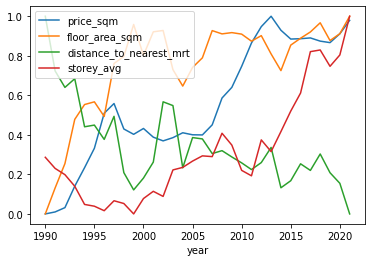

In [568]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df_by_year = df_final[['price_sqm', 'floor_area_sqm','year','distance_to_nearest_mrt','storey_avg']].groupby('year').mean()
df_by_year[['price_sqm', 'floor_area_sqm','distance_to_nearest_mrt','storey_avg']] = mms.fit_transform(df_by_year[['price_sqm', 'floor_area_sqm','distance_to_nearest_mrt','storey_avg']])
df_by_year.plot()

#### rank the variance of the variable

In [569]:
from sklearn.feature_selection import VarianceThreshold

# var0_filter = VarianceThreshold(threshold=0.0)
# var0_filter.fit(df_final, y= df_final['price_sqm'])

# pd.DataFrame(df_final.columns[var0_filter.get_support()==False])

var5_filter = VarianceThreshold(threshold=0.05)
var5_filter.fit(df_final, y= df_final['price_sqm'])

pd.DataFrame(df_final.columns[var5_filter.get_support()==False])

,0
0,School
1,toilet_number
2,town_BISHAN
3,town_BUKIT BATOK
4,town_BUKIT MERAH
5,town_BUKIT PANJANG
6,town_BUKIT TIMAH
7,town_CENTRAL AREA
8,town_CHOA CHU KANG
9,town_CLEMENTI


In [124]:
df_final.columns

Index(['floor_area_sqm', 'remaining_lease', 'year', 'price_sqm', 'Bus',
       'Entertainment', 'Food', 'School', 'Shop', 'toilet_number',
       'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK',
       'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH',
       'town_CENTRAL AREA', 'town_CHOA CHU KANG', 'town_CLEMENTI',
       'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST',
       'town_KALLANG/WHAMPOA', 'town_LIM CHU KANG', 'town_MARINE PARADE',
       'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG',
       'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH',
       'town_WOODLANDS', 'town_YISHUN', 'direction_CENTRAL', 'direction_EAST',
       'direction_NORTH', 'direction_NORTH_EAST', 'direction_WEST',
       'flat_type_1 ROOM', 'flat_type_2 ROOM', 'flat_type_3 ROOM',
       'flat_type_4 ROOM', 'flat_type_5 ROOM', 'flat_type_EXECUTIVE',
       'flat_type_MULTI-GENERATION', 'flat_model_2-room',


#### Floor area, distance to nearest mrt and storey level is changing dramatically by the years

Text(0.5, 1.0, 'Correlation Plot for 2020')

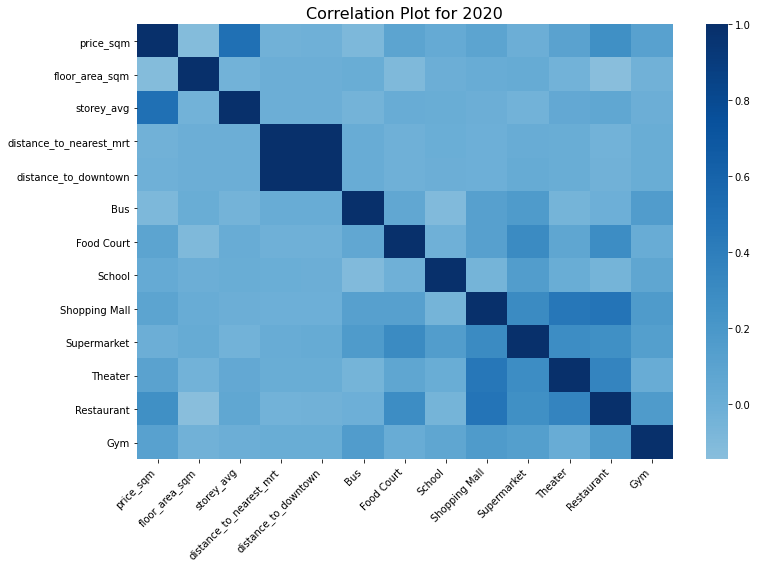

In [571]:
df_2020 = df_final[df_final['year']==2020]
df_corr1 = df_2020[['price_sqm', 'floor_area_sqm','storey_avg',
       'distance_to_nearest_mrt','distance_to_downtown', 'Bus', 'Food Court', 'School',
       'Shopping Mall', 'Supermarket', 'Theater','Restaurant','Gym']].copy()

df_corr1['distance_to_nearest_mrt'] = -1*df_corr1['distance_to_nearest_mrt']
df_corr1['distance_to_downtown'] = -1*df_corr1['distance_to_downtown']
corr1 = df_corr1.corr()

plt.figure(figsize=(12,8))
ax = sns.heatmap(corr1,
                 center = 0,
                 cmap='Blues')


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

ax.set_title("Correlation Plot for 2020", size =16)

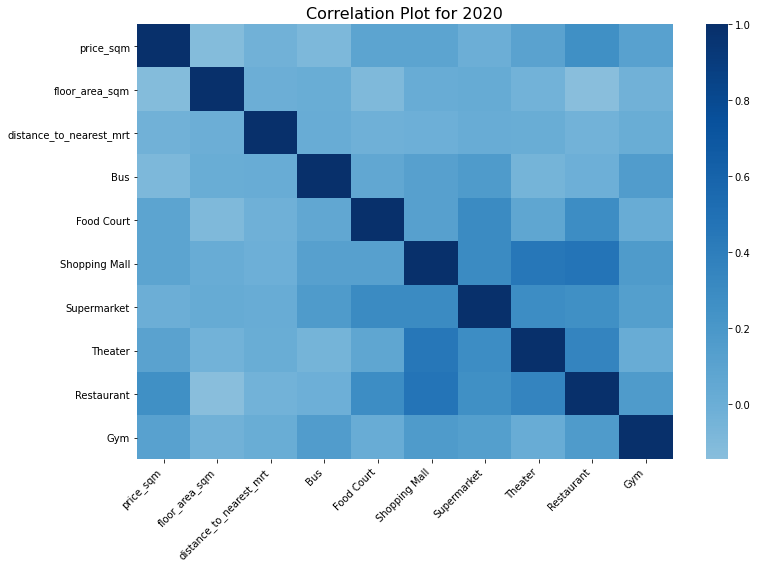

In [572]:
df_2010 = df_final[df_final['year']>=2018]
df_corr1 = df_2020[['price_sqm', 'floor_area_sqm',
       'distance_to_nearest_mrt', 'Bus', 'Food Court', 
       'Shopping Mall', 'Supermarket', 'Theater','Restaurant','Gym']].copy()

df_corr1['distance_to_nearest_mrt'] = -1*df_corr1['distance_to_nearest_mrt']
corr1 = df_corr1.corr()

plt.figure(figsize=(12,8))
ax = sns.heatmap(corr1,
                 center = 0,
                 cmap='Blues')


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

ax.set_title("Correlation Plot for 2020", size =16);

Text(0.5, 1.0, 'Correlation Plot for 2020')

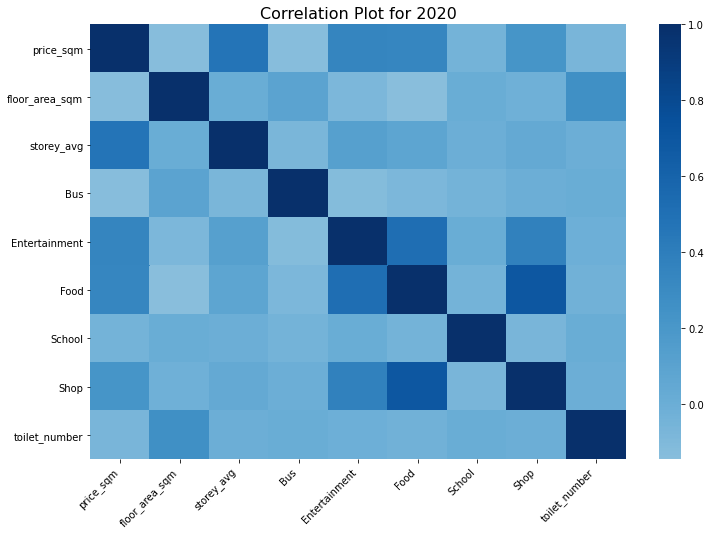

In [126]:
df_2020 = df_final[df_final['year']>=2015]
df_corr1 = df_2020[['price_sqm', 'floor_area_sqm','storey_avg','Bus',
       'Entertainment', 'Food', 'School', 'Shop', 'toilet_number']].copy()


corr1 = df_corr1.corr()

plt.figure(figsize=(12,8))
ax = sns.heatmap(corr1,
                 center = 0,
                 cmap='Blues')


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

ax.set_title("Correlation Plot for 2020", size =16)

In [573]:
df_final.to_csv("dat_final.csv", index = False)

## 3. Model Building and Evaluation 

In [127]:
# Split datasets into train and test datasets
from sklearn.model_selection import train_test_split

df_final = pd.read_csv('dat_final.csv')
y = df_final['price_sqm']
X = df_final.drop(['price_sqm'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 2020)

In [575]:
df_final.columns

Index(['Unnamed: 0', 'floor_area_sqm', 'remaining_lease', 'year', 'price_sqm',
       'Unnamed: 0.1', 'distance_to_downtown', 'distance_to_nearest_mrt',
       'Bus', 'Food Court', 'Gym', 'Restaurant', 'School', 'Shopping Mall',
       'Supermarket', 'Theater', 'toilet_number', 'town_ANG MO KIO',
       'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
       'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA',
       'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG',
       'town_JURONG EAST', 'town_JURONG WEST', 'town_KALLANG/WHAMPOA',
       'town_LIM CHU KANG', 'town_MARINE PARADE', 'town_PASIR RIS',
       'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG',
       'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS',
       'town_YISHUN', 'direction_CENTRAL', 'direction_EAST', 'direction_NORTH',
       'direction_NORTH_EAST', 'direction_WEST', 'flat_type_1 ROOM',
       'flat_type_2 ROOM', 'flat_ty